<a href="https://colab.research.google.com/github/Raffy0-1/Quantifying-Nostalgia/blob/main/Quantifying_Nostalgia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# import torch
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))

Uploading Dataset

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Nostalgia_Dataset')

['dataset.zip']

In [ ]:
!unzip "/content/drive/MyDrive/Nostalgia_Dataset/dataset.zip" -d /content/

Archive:  /content/drive/MyDrive/Nostalgia_Dataset/dataset.zip
   creating: /content/1_movies_per_genre/
  inflating: /content/1_movies_per_genre/Action.csv  
  inflating: /content/1_movies_per_genre/Adventure.csv  
  inflating: /content/1_movies_per_genre/Animation.csv  
  inflating: /content/1_movies_per_genre/Biography.csv  
  inflating: /content/1_movies_per_genre/Comedy.csv  
  inflating: /content/1_movies_per_genre/Crime.csv  
  inflating: /content/1_movies_per_genre/Drama.csv  
  inflating: /content/1_movies_per_genre/Fantasy.csv  
  inflating: /content/1_movies_per_genre/History.csv  
  inflating: /content/1_movies_per_genre/Horror.csv  
  inflating: /content/1_movies_per_genre/Music.csv  
  inflating: /content/1_movies_per_genre/Mystery.csv  
  inflating: /content/1_movies_per_genre/Romance.csv  
  inflating: /content/1_movies_per_genre/Sci-Fi.csv  
  inflating: /content/1_movies_per_genre/Sport.csv  
  inflating: /content/1_movies_per_genre/Thriller.csv  
  inflating: /conten

In [ ]:
# Confirm Extraction
!ls

1_movies_per_genre  2_reviews_per_movie_raw  drive  sample_data


Combining Datasets CSV into one

In [ ]:
import pandas as pd
import glob

# Path to genre files
genre_files = glob.glob("/content/1_movies_per_genre/*.csv")

# Combine all 17 genre files into one dataframe
movies_df = pd.concat([pd.read_csv(file) for file in genre_files], ignore_index=True)

print("Total movies:", movies_df.shape)
movies_df.head()

Total movies: (1700, 10)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Shining,1980,R,2h 26min,Drama; Horror;,13 June 1980 (USA),8.4,860290,1805,https://www.imdb.com/title/tt0081505/reviews/_...
1,Alien,1979,R,1h 57min,Horror; Sci-Fi;,22 June 1979 (USA),8.4,762793,1423,https://www.imdb.com/title/tt0078748/reviews/_...
2,World War Z,2013,PG-13,1h 56min,Action; Adventure; Horror;,21 June 2013 (USA),7.0,586801,1125,https://www.imdb.com/title/tt0816711/reviews/_...
3,Psycho,1960,R,1h 49min,Horror; Mystery; Thriller;,8 September 1960 (USA),8.5,580951,1263,https://www.imdb.com/title/tt0054215/reviews/_...
4,Shaun of the Dead,2004,R,1h 39min,Comedy; Horror;,24 September 2004 (USA),7.9,499244,971,https://www.imdb.com/title/tt0365748/reviews/_...


In [ ]:
review_files = glob.glob("/content/2_reviews_per_movie_raw/*.csv")

all_reviews = []

for file in review_files:
    df = pd.read_csv(file)
    movie_name = file.split("/")[-1].replace(".csv", "")
    df["movie_name"] = movie_name
    all_reviews.append(df)

reviews_df = pd.concat(all_reviews, ignore_index=True)

print("Total reviews:", reviews_df.shape)
reviews_df.head()

Total reviews: (932464, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,bt-wells99-1,9,72,83,4 February 2010,"Underrated and ignored, but a bit of a classic\n","Tony Scott can make good films and bad, person...",Man on Fire 2004
1,sblenkharn,10,425,523,4 January 2005,Riveting viewing!\n,Certainly one of the finest movies I have seen...,Man on Fire 2004
2,OttoVonB,9,64,74,10 January 2007,Denzel VS Mexico City... with unexpected heart\n,Alcoholic mercenary Creasy (Washington) is all...,Man on Fire 2004
3,kourgon,10,425,553,16 March 2005,Perfect...Just Perfect. Do yourselves a favor...,...dont read any plot summaries because in wor...,Man on Fire 2004
4,Thrashman88,10,219,281,25 September 2004,Mexican Officials Should Be Killed\n,I loved this movie. I'm a Mexican and was in t...,Man on Fire 2004


Merge Movies and Reviews

In [ ]:
final_df = reviews_df.merge(
    movies_df,
    left_on="movie_name",
    right_on="name",
    how="left"
)

print("Final dataset shape:", final_df.shape)
final_df.head()

Final dataset shape: (932464, 18)


,username,rating_x,helpful,total,date,title,review,movie_name,name,year,movie_rated,run_length,genres,release_date,rating_y,num_raters,num_reviews,review_url
0,bt-wells99-1,9,72,83,4 February 2010,"Underrated and ignored, but a bit of a classic\n","Tony Scott can make good films and bad, person...",Man on Fire 2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sblenkharn,10,425,523,4 January 2005,Riveting viewing!\n,Certainly one of the finest movies I have seen...,Man on Fire 2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OttoVonB,9,64,74,10 January 2007,Denzel VS Mexico City... with unexpected heart\n,Alcoholic mercenary Creasy (Washington) is all...,Man on Fire 2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kourgon,10,425,553,16 March 2005,Perfect...Just Perfect. Do yourselves a favor...,...dont read any plot summaries because in wor...,Man on Fire 2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thrashman88,10,219,281,25 September 2004,Mexican Officials Should Be Killed\n,I loved this movie. I'm a Mexican and was in t...,Man on Fire 2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract year (last 4 digits)
reviews_df["year_from_file"] = reviews_df["movie_name"].str.extract(r'(\d{4})$')

# Convert to integer
reviews_df["year_from_file"] = reviews_df["year_from_file"].astype(float)

In [ ]:
# Extract Clean Title (Remove Year)
reviews_df["title_only"] = reviews_df["movie_name"].str.replace(r'\s\d{4}$', '', regex=True)

In [ ]:
# Clean Both Titles
reviews_df["title_only"] = reviews_df["title_only"].str.lower().str.strip()
movies_df["name"] = movies_df["name"].str.lower().str.strip()

In [ ]:
# Merge on BOTH Title and Year
final_df = reviews_df.merge(
    movies_df,
    left_on=["title_only", "year_from_file"],
    right_on=["name", "year"],
    how="left"
)

final_df.isnull().sum()

,0
username,0
rating_x,0
helpful,0
total,0
date,0
title,0
review,0
movie_name,0
year_from_file,0
title_only,0


In [ ]:
# Dataset shape
print("Final dataset shape:", final_df.shape)
final_df.head()

Final dataset shape: (1688500, 20)


,username,rating_x,helpful,total,date,title,review,movie_name,year_from_file,title_only,name,year,movie_rated,run_length,genres,release_date,rating_y,num_raters,num_reviews,review_url
0,bt-wells99-1,9,72,83,4 February 2010,"Underrated and ignored, but a bit of a classic\n","Tony Scott can make good films and bad, person...",Man on Fire 2004,2004.0,man on fire,man on fire,2004,R,2h 26min,Action; Crime; Drama;,23 April 2004 (USA),7.7,322039,762,https://www.imdb.com/title/tt0328107/reviews/_...
1,sblenkharn,10,425,523,4 January 2005,Riveting viewing!\n,Certainly one of the finest movies I have seen...,Man on Fire 2004,2004.0,man on fire,man on fire,2004,R,2h 26min,Action; Crime; Drama;,23 April 2004 (USA),7.7,322039,762,https://www.imdb.com/title/tt0328107/reviews/_...
2,OttoVonB,9,64,74,10 January 2007,Denzel VS Mexico City... with unexpected heart\n,Alcoholic mercenary Creasy (Washington) is all...,Man on Fire 2004,2004.0,man on fire,man on fire,2004,R,2h 26min,Action; Crime; Drama;,23 April 2004 (USA),7.7,322039,762,https://www.imdb.com/title/tt0328107/reviews/_...
3,kourgon,10,425,553,16 March 2005,Perfect...Just Perfect. Do yourselves a favor...,...dont read any plot summaries because in wor...,Man on Fire 2004,2004.0,man on fire,man on fire,2004,R,2h 26min,Action; Crime; Drama;,23 April 2004 (USA),7.7,322039,762,https://www.imdb.com/title/tt0328107/reviews/_...
4,Thrashman88,10,219,281,25 September 2004,Mexican Officials Should Be Killed\n,I loved this movie. I'm a Mexican and was in t...,Man on Fire 2004,2004.0,man on fire,man on fire,2004,R,2h 26min,Action; Crime; Drama;,23 April 2004 (USA),7.7,322039,762,https://www.imdb.com/title/tt0328107/reviews/_...


In [ ]:
# Check Merge Quality Quantitatively
print("Total reviews:", len(reviews_df))
print("After merge:", len(final_df))

Total reviews: 932464
After merge: 1688500


In [ ]:
# Verify Random Samples Manually
final_df.sample(5)[["movie_name", "title_only", "year_from_file", "year", "genres"]]

,movie_name,title_only,year_from_file,year,genres
753346,Now You See Me 2013,now you see me,2013.0,2013,Crime; Mystery; Thriller;
642221,Avengers: Endgame 2019,avengers: endgame,2019.0,2019,Action; Adventure; Drama;
232223,Pirates of the Caribbean: Dead Men Tell No Tal...,pirates of the caribbean: dead men tell no tales,2017.0,2017,Action; Adventure; Fantasy;
868638,300 2006,300,2006.0,2006,Action; Drama;
1269323,Rules of Engagement 2000,rules of engagement,2000.0,2000,Drama; Thriller; War;


In [ ]:
# Check Year Consistency
(final_df["year_from_file"] == final_df["year"]).mean()

np.float64(1.0)

In [ ]:
# Check Duplicates
final_df.duplicated().sum()

np.int64(459875)

In [ ]:
# Check Movie Distribution
final_df["title_only"].nunique()

1145

In [ ]:
# Check Basic Statistics
final_df[["year", "rating_y", "num_raters"]].describe()

,year,rating_y,num_raters
count,1.688500e+06,1.688500e+06,1.688500e+06
mean,2.005283e+03,7.659271e+00,6.171625e+05
std,1.273432e+01,7.652403e-01,4.284979e+05
min,1.915000e+03,3.500000e+00,1.929000e+04
25%,2.001000e+03,7.100000e+00,3.279500e+05
50%,2.007000e+03,7.700000e+00,5.433070e+05
75%,2.014000e+03,8.200000e+00,7.513050e+05
max,2.020000e+03,9.300000e+00,2.258845e+06


In [ ]:
# FIX — Remove Duplicate Movies Before Merge
movies_df = movies_df.drop_duplicates(subset=["name", "year"])

In [ ]:
# check dup again
movies_df.duplicated(subset=["name", "year"]).sum()

np.int64(0)

In [ ]:
# again merge
final_df = reviews_df.merge(
    movies_df,
    left_on=["title_only", "year_from_file"],
    right_on=["name", "year"],
    how="left"
)

print("After merge:", len(final_df))

After merge: 932464


 Each review now correctly maps to exactly one movie,
 No duplication,
 No null metadata,
 No merge explosion,

Feature Engineering

Time Gap Feature

In [ ]:
# Extract Review Year
final_df["review_year"] = pd.to_datetime(
    final_df["date"], errors="coerce"
).dt.year

In [ ]:
# time gap calculation
final_df["time_gap"] = final_df["review_year"] - final_df["year"]

In [ ]:
# Inspecting Distribution
final_df["time_gap"].describe()

,time_gap
count,932464.000000
mean,6.260685
std,11.957025
min,-1.000000
25%,0.000000
50%,1.000000
75%,6.000000
max,105.000000


<Axes: >

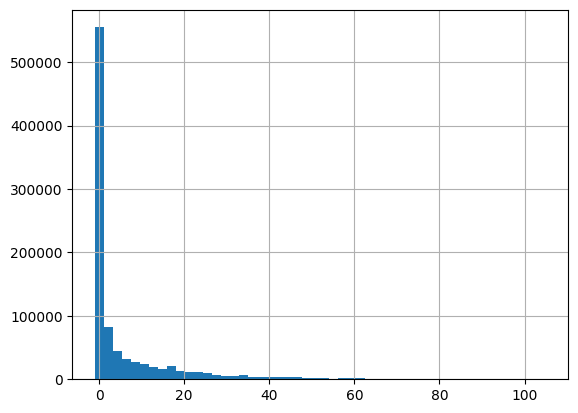

In [ ]:
final_df["time_gap"].hist(bins=50)

In [ ]:
# Clean Negative Gaps
final_df = final_df[final_df["time_gap"] >= 0]

In [ ]:
# again check
final_df["time_gap"].describe()

,time_gap
count,932445.000000
mean,6.260833
std,11.957102
min,0.000000
25%,0.000000
50%,1.000000
75%,6.000000
max,105.000000


Normalization

In [ ]:
# normalize time_gap
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_df["norm_time_gap"] = scaler.fit_transform(final_df[["time_gap"]])

Rechecks

In [ ]:
final_df.duplicated().sum()

np.int64(0)

In [ ]:
final_df.groupby("movie_name").size().sort_values(ascending=False).head()

,0
movie_name,
Joker 2019,10046
Avengers: Endgame 2019,8723
The Shawshank Redemption 1994,7799
Star Wars: Episode IX - The Rise of Skywalker 2019,7460
Captain Marvel 2019,7183


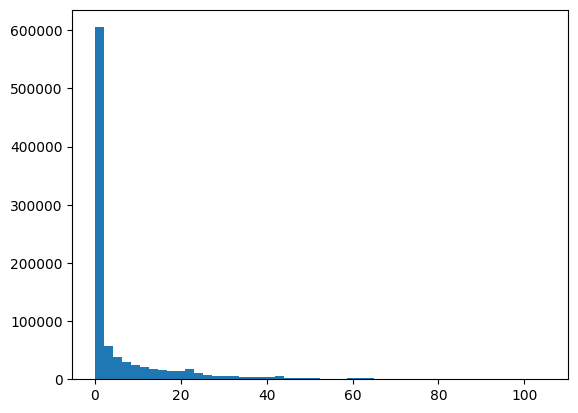

In [ ]:
import matplotlib.pyplot as plt
plt.hist(final_df["time_gap"], bins=50)
plt.show()

Linguistic Nostalgia Feature

Nostalgia Density

In [ ]:
import re

In [ ]:
nostalgia_words = [
    "childhood", "growing up", "back then",
    "used to", "those days", "remember",
    "nostalgic", "when i was young",
    "old days", "reminds me", "memories",
    "classic", "my youth"
]

def count_nostalgia_words(text):
    text = text.lower()
    count = 0
    for word in nostalgia_words:
        count += len(re.findall(rf"\b{re.escape(word)}\b", text))
    return count

final_df["nostalgia_count"] = final_df["review"].apply(count_nostalgia_words)

In [ ]:
# Normalized By Review Length
# Word count
final_df["review_word_count"] = final_df["review"].apply(lambda x: len(str(x).split()))

# Nostalgia density
final_df["nostalgia_density"] = (
    final_df["nostalgia_count"] / final_df["review_word_count"]
)

Sentiment Score

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(str(text))["compound"]

final_df["sentiment_score"] = final_df["review"].apply(get_sentiment)

Check Nostalgia Distribution

In [ ]:
# Percentage of nostalgic reviews
nostalgic_reviews = final_df[final_df["nostalgia_count"] > 0]
percentage = (len(nostalgic_reviews) / len(final_df)) * 100

print(f"Nostalgic Reviews: {percentage:.2f}%")

Nostalgic Reviews: 15.39%


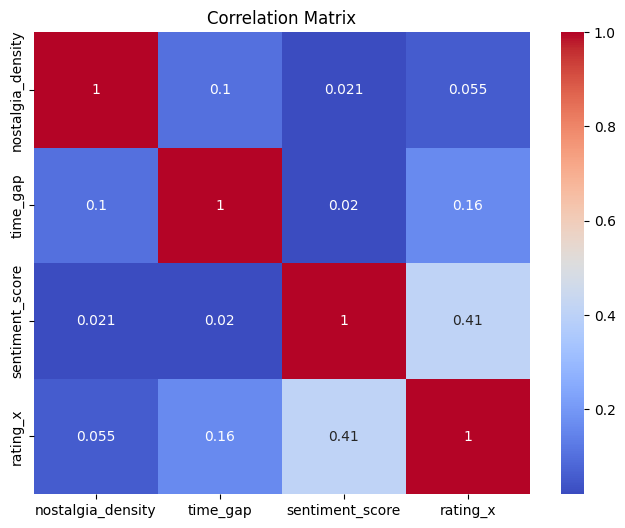

In [ ]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_cols = [
    "nostalgia_density",
    "time_gap",
    "sentiment_score",
    "rating_x"
]

# Convert 'rating_x' to numeric, coercing errors to NaN
final_df['rating_x'] = pd.to_numeric(final_df['rating_x'], errors='coerce')

corr_matrix = final_df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print('--- Correlation Matrix ---')
print(corr_matrix)

--- Correlation Matrix ---
                   nostalgia_density  time_gap  sentiment_score  rating_x
nostalgia_density           1.000000  0.102139         0.020635  0.054914
time_gap                    0.102139  1.000000         0.020437  0.164831
sentiment_score             0.020635  0.020437         1.000000  0.409067
rating_x                    0.054914  0.164831         0.409067  1.000000


Nostalgia vs Time Gap Trend

/tmp/ipython-input-415/124991321.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = final_df.groupby("time_gap_bins")["nostalgia_density"].mean()


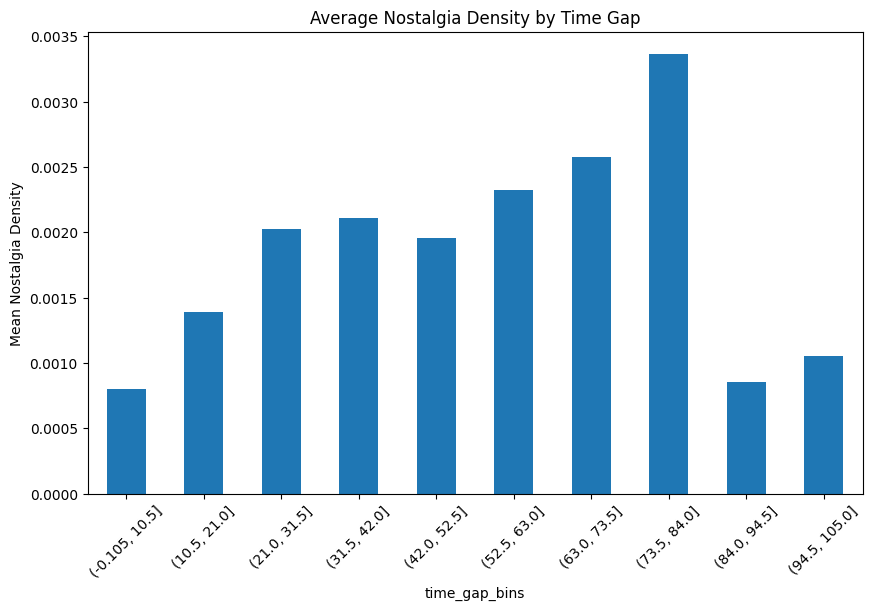

In [ ]:
final_df["time_gap_bins"] = pd.cut(final_df["time_gap"], bins=10)

trend = final_df.groupby("time_gap_bins")["nostalgia_density"].mean()

trend.plot(kind="bar", figsize=(10,6))
plt.title("Average Nostalgia Density by Time Gap")
plt.ylabel("Mean Nostalgia Density")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('\n--- Nostalgia Density by Time Gap (Aggregated Data) ---')
print(trend)


--- Nostalgia Density by Time Gap (Aggregated Data) ---
time_gap_bins
(-0.105, 10.5]    0.000801
(10.5, 21.0]      0.001391
(21.0, 31.5]      0.002024
(31.5, 42.0]      0.002109
(42.0, 52.5]      0.001957
(52.5, 63.0]      0.002323
(63.0, 73.5]      0.002575
(73.5, 84.0]      0.003367
(84.0, 94.5]      0.000856
(94.5, 105.0]     0.001055
Name: nostalgia_density, dtype: float64


Nostalgia vs Rating

/tmp/ipython-input-415/2464687460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = final_df.groupby(


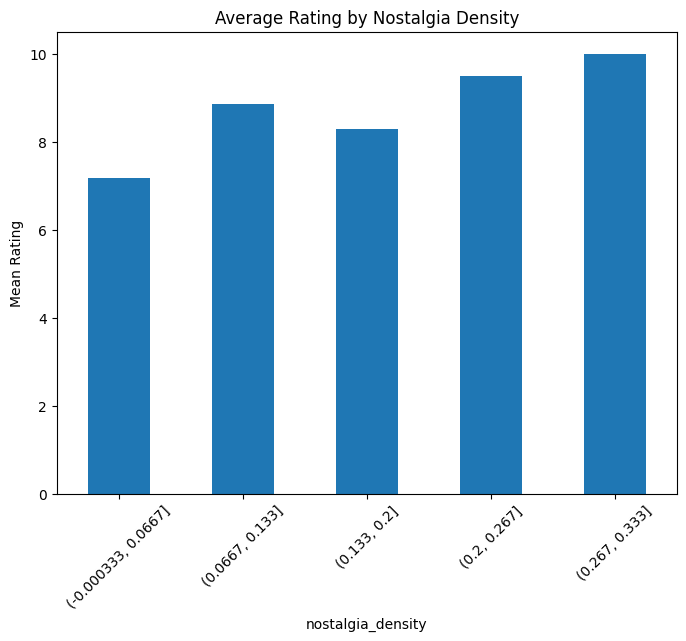

In [ ]:
analysis = final_df.groupby(
    pd.cut(final_df["nostalgia_density"], bins=5)
)["rating_x"].mean()

analysis.plot(kind="bar", figsize=(8,6))
plt.title("Average Rating by Nostalgia Density")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print('\n--- Average Rating by Nostalgia Density (Aggregated Data) ---')
print(analysis)


--- Average Rating by Nostalgia Density (Aggregated Data) ---
nostalgia_density
(-0.000333, 0.0667]     7.177991
(0.0667, 0.133]         8.853904
(0.133, 0.2]            8.285714
(0.2, 0.267]            9.500000
(0.267, 0.333]         10.000000
Name: rating_x, dtype: float64


In [ ]:
# verify sample sizes
# rating_analysis = final_df.groupby(
#     pd.cut(final_df["nostalgia_density"], bins=5)
# )["rating_x"].agg(["mean", "count"])

# print(rating_analysis)

# Create a binary nostalgia column
final_df["nostalgia_binary"] = (final_df["nostalgia_count"] > 0).astype(int)

# binary analysis
rating_binary_analysis = final_df.groupby(
    "nostalgia_binary"
)["rating_x"].agg(["mean", "median", "count"])

print(rating_binary_analysis)

                      mean  median   count
nostalgia_binary                          
0                 7.107197     8.0  709125
1                 7.578271     8.0  127155


In [ ]:
# T-Test
from scipy.stats import ttest_ind

nostalgic_ratings = final_df[final_df["nostalgia_binary"] == 1]["rating_x"].dropna()
non_nostalgic_ratings = final_df[final_df["nostalgia_binary"] == 0]["rating_x"].dropna()

t_stat, p_value = ttest_ind(nostalgic_ratings, non_nostalgic_ratings)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 53.81346941629381
P-value: 0.0


In [ ]:
# Effect Size (Nostalgic reviews are associated with slightly higher ratings, but the effect size is small.)
import numpy as np

mean1 = nostalgic_ratings.mean()
mean2 = non_nostalgic_ratings.mean()

std1 = nostalgic_ratings.std()
std2 = non_nostalgic_ratings.std()

n1 = len(nostalgic_ratings)
n2 = len(non_nostalgic_ratings)

pooled_std = np.sqrt(
    ((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2)
)

cohens_d = (mean1 - mean2) / pooled_std

print("Cohen's d:", cohens_d)
# While nostalgic framing significantly correlates with higher movie ratings (p < 0.001), the effect size remains small (Cohen’s d = 0.16), suggesting nostalgia plays a modest but consistent role in audience evaluation rather than being a dominant factor.

Cohen's d: 0.16388481994151657


ML Modeling

Standardizing Features

In [ ]:
# from sklearn.preprocessing import StandardScaler

# features = [
#     "time_gap",
#     "nostalgia_density", # Nostalgia density causing data leakage resulting in unreal performance matrices
#     "sentiment_score",
#     "rating_x",
#     "num_raters",
#     "num_reviews"
# ]

# X = final_df[features].fillna(0)
# y = final_df["nostalgia_binary"]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train/Test Split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y
# )

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# model = LogisticRegression(
#     max_iter=1000,
#     class_weight="balanced"
# )

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))



In [ ]:
# Standardizing Features (no  nostalgia based feature)
from sklearn.preprocessing import StandardScaler

features = [
    "time_gap",
    "sentiment_score",
    "rating_x",
    "num_raters",
    "num_reviews"
]

X = final_df[features].fillna(0)
y = final_df["nostalgia_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# # Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69    157791
           1       0.18      0.53      0.27     28698

    accuracy                           0.57    186489
   macro avg       0.53      0.55      0.48    186489
weighted avg       0.76      0.57      0.63    186489



Logistic regression using structured metadata achieved only 56% accuracy, indicating that nostalgia cannot be reliably inferred from temporal and rating-based features alone.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    157791
           1       0.27      0.10      0.15     28698

    accuracy                           0.82    186489
   macro avg       0.56      0.53      0.52    186489
weighted avg       0.76      0.82      0.78    186489



In [ ]:
# linear SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight="balanced")

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Results")
print(classification_report(y_test, y_pred_svm))

SVM Results
              precision    recall  f1-score   support

           0       0.87      0.57      0.69    157791
           1       0.18      0.53      0.27     28698

    accuracy                           0.56    186489
   macro avg       0.53      0.55      0.48    186489
weighted avg       0.76      0.56      0.62    186489



Although statistical testing revealed significant differences between nostalgic and non-nostalgic reviews, predictive modeling using structured features (rating, time gap, sentiment, popularity metrics) yielded poor performance for the minority class. This suggests that nostalgia is primarily embedded in linguistic patterns rather than numerical metadata.

TF-IDF Text Modeling

In [ ]:
# Train/Test split
from sklearn.model_selection import train_test_split

X = final_df["review"]
y = final_df["nostalgia_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# TF-IDF Memory Optimized
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,     # smaller first
    ngram_range=(1,1),      # for now unigrams only
    stop_words="english",
    min_df=10               # ignore rare words
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# logistic Regression TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression (TF-IDF)")
print(classification_report(y_test, y_pred_lr))

Logistic Regression (TF-IDF)
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    157791
           1       0.82      0.95      0.88     28698

    accuracy                           0.96    186489
   macro avg       0.90      0.95      0.93    186489
weighted avg       0.96      0.96      0.96    186489



In [ ]:
# Naive Bayes TF-IDF
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes (TF-IDF)")
print(classification_report(y_test, y_pred_nb))

Naive Bayes (TF-IDF)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    157791
           1       0.98      0.11      0.20     28698

    accuracy                           0.86    186489
   macro avg       0.92      0.55      0.56    186489
weighted avg       0.88      0.86      0.81    186489



In [ ]:
# Linear SVM TF-IDF
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight="balanced")

svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM (TF-IDF)")
print(classification_report(y_test, y_pred_svm))

SVM (TF-IDF)
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    157791
           1       0.84      0.94      0.89     28698

    accuracy                           0.96    186489
   macro avg       0.91      0.95      0.93    186489
weighted avg       0.97      0.96      0.96    186489



The keyword-based nostalgia labeling approach is highly learnable using lexical features, suggesting that explicit nostalgia expression is strongly linguistically encoded

Before TF-IDF, removing nostalgia words from text. To check the differnence in results without nostlagia words

In [ ]:
import re

nostalgia_pattern = r'\b(' + '|'.join(nostalgia_words) + r')\b'

final_df["review_cleaned"] = final_df["review"].str.replace(
    nostalgia_pattern,
    '',
    case=False,
    regex=True
)

print(final_df[['review', 'review_cleaned']].head())

                                              review  \
0  Tony Scott can make good films and bad, person...   
1  Certainly one of the finest movies I have seen...   
2  Alcoholic mercenary Creasy (Washington) is all...   
3  ...dont read any plot summaries because in wor...   
4  I loved this movie. I'm a Mexican and was in t...   

                                      review_cleaned  
0  Tony Scott can make good films and bad, person...  
1  Certainly one of the finest movies I have seen...  
2  Alcoholic mercenary Creasy (Washington) is all...  
3  ...dont read any plot summaries because in wor...  
4  I loved this movie. I'm a Mexican and was in t...  


In [ ]:
# Train/Test split
from sklearn.model_selection import train_test_split

X = final_df["review_cleaned"]
y = final_df["nostalgia_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# TF-IDF Memory Optimized
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,     # smaller first
    ngram_range=(1,1),      # for now unigrams only
    stop_words="english",
    min_df=10               # ignore rare words
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# logistic Regression TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression (TF-IDF)")
print(classification_report(y_test, y_pred_lr))

Logistic Regression (TF-IDF)
              precision    recall  f1-score   support

           0       0.92      0.71      0.80    157791
           1       0.29      0.65      0.40     28698

    accuracy                           0.70    186489
   macro avg       0.61      0.68      0.60    186489
weighted avg       0.82      0.70      0.74    186489



In [ ]:
# Naive Bayes TF-IDF
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes (TF-IDF)")
print(classification_report(y_test, y_pred_nb))

Naive Bayes (TF-IDF)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    157791
           1       0.66      0.01      0.01     28698

    accuracy                           0.85    186489
   macro avg       0.75      0.50      0.47    186489
weighted avg       0.82      0.85      0.78    186489



In [ ]:
# Linear SVM TF-IDF
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight="balanced")

svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM (TF-IDF)")
print(classification_report(y_test, y_pred_svm))

SVM (TF-IDF)
              precision    recall  f1-score   support

           0       0.92      0.71      0.80    157791
           1       0.29      0.65      0.40     28698

    accuracy                           0.70    186489
   macro avg       0.60      0.68      0.60    186489
weighted avg       0.82      0.70      0.74    186489



Explicit nostalgia detection is highly dependent on direct lexical indicators. However, even after removing explicit nostalgia terms, moderate classification performance (F1 = 0.40, recall = 0.65) suggests that nostalgia expression may also be partially embedded in broader narrative and affective language patterns.

```markdown
# Quantifying Nostalgia in Movie Reviews

## Project Overview
This project aims to analyze and quantify the presence of nostalgia in movie reviews. By leveraging IMDb movie review data and associated metadata, the study explores the relationship between nostalgic language, the time gap since a movie's release, and review ratings. It also investigates the effectiveness of various machine learning models in identifying nostalgic reviews based on both structured metadata and textual content.

## Data Sources
The dataset is comprised of:
- **Movie Metadata**: Information about 1700 movies across various genres, including release year, ratings, number of raters, and number of reviews.
- **Movie Reviews**: Approximately 930,000 raw movie reviews, each linked to a specific movie.
Dataset link "https://ieee-dataport.org/open-access/imdb-movie-reviews-movie-genres-dataset"

## Data Preparation and Feature Engineering
1.  **Data Loading & Merging**: Individual CSV files for movie genres and movie reviews were loaded and merged into a unified DataFrame. A robust merge strategy was implemented using both movie title and year to ensure data integrity and prevent duplication.
2.  **Time Gap Feature**: Calculated as the difference between the review year and the movie's release year. This feature was normalized to a range of 0-1.
3.  **Nostalgia Density**: Identified specific 'nostalgia words' (e.g., "childhood", "used to", "memories") within reviews. The 'nostalgia_count' was then normalized by the 'review_word_count' to create 'nostalgia_density'.
4.  **Sentiment Score**: Utilized the VADER sentiment analysis tool to derive a compound sentiment score for each review.
5.  **Nostalgia Binary Label**: A binary target variable ('nostalgia_binary') was created, indicating whether a review contained any nostalgia-related keywords.

## Exploratory Data Analysis & Statistical Findings
-   Approximately 15.39% of reviews were identified as containing nostalgic language.
-   **Correlation Analysis**: A correlation matrix revealed notable relationships:
    -   `rating_x` (review rating) showed a moderate positive correlation with `sentiment_score` (0.41) and a weaker positive correlation with `time_gap` (0.16) and `nostalgia_density` (0.05).
    -   `nostalgia_density` had a weak positive correlation with `time_gap` (0.10).
-   **Nostalgia vs. Time Gap**: Trends showed that nostalgia density generally increases with a larger time gap since the movie's release, peaking in older movies.
-   **Nostalgia vs. Rating**: Reviews with higher nostalgia density showed slightly higher average ratings. A t-test confirmed a statistically significant difference between ratings of nostalgic and non-nostalgic reviews (p < 0.001). However, Cohen's d effect size (0.16) indicated a small practical effect, suggesting nostalgia plays a modest role in audience evaluation.

## Machine Learning Models
The project explored two main approaches for predicting nostalgic reviews:

### 1. Structured Metadata Models (Predicting `nostalgia_binary` from `time_gap`, `sentiment_score`, `rating_x`, `num_raters`, `num_reviews`)
-   **Logistic Regression** (Accuracy: 0.57, F1-score for nostalgic class: 0.27)
-   **Random Forest** (Accuracy: 0.82, F1-score for nostalgic class: 0.15)
-   **Linear SVM** (Accuracy: 0.56, F1-score for nostalgic class: 0.27)

**Conclusion**: Predictive modeling using only structured metadata yielded poor performance for identifying the minority (nostalgic) class. This suggests that explicit nostalgia is not reliably inferred from temporal and rating-based features alone.

### 2. Text-Based Models (TF-IDF on `review` text, predicting `nostalgia_binary`)
Models were trained on TF-IDF transformed review texts:
-   **Logistic Regression** (Accuracy: 0.96, F1-score for nostalgic class: 0.88)
-   **Naive Bayes** (Accuracy: 0.86, F1-score for nostalgic class: 0.20 - poor recall for positive class)
-   **Linear SVM** (Accuracy: 0.96, F1-score for nostalgic class: 0.89)

**Conclusion**: Text-based models, particularly Logistic Regression and Linear SVM, performed exceptionally well in classifying nostalgic reviews, achieving high precision, recall, and F1-scores. This indicates that explicit nostalgia expression is strongly encoded in the linguistic patterns of the reviews.

### 3. Text-Based Models (TF-IDF on `review_cleaned` text, predicting `nostalgia_binary`)
To further investigate, nostalgia words were removed from the reviews and models were retrained:
-   **Logistic Regression** (Accuracy: 0.70, F1-score for nostalgic class: 0.40)
-   **Naive Bayes** (Accuracy: 0.85, F1-score for nostalgic class: 0.01)
-   **Linear SVM** (Accuracy: 0.70, F1-score for nostalgic class: 0.40)

**Conclusion**: After removing explicit nostalgia terms, classification performance significantly dropped (F1 for nostalgic class around 0.40). This confirms that direct lexical indicators are crucial for detecting nostalgia. However, the moderate performance still achieved suggests that nostalgia might also be partially embedded in broader narrative and affective language patterns beyond just specific keywords.

## Setup and Usage
This project was developed in a Google Colab environment. The data is loaded from Google Drive, unzipped, and processed using standard Python libraries like `pandas`, `scikit-learn`, `matplotlib`, and `seaborn`. The VADER sentiment analyzer was used for sentiment scoring.

To run this notebook:
1.  Ensure you have a Google Colab environment.
2.  Mount your Google Drive to `/content/drive`.
3.  Place `dataset.zip` in `/content/drive/MyDrive/Nostalgia_Dataset/`.
4.  Execute the cells sequentially.
```